In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report


import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D, Add, ReLU, Reshape, LSTM
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('train data shape : {}'.format(train_data.shape))
print('test data shape : {}'.format(test_data.shape))

train data shape : (60000, 785)
test data shape : (10000, 785)


In [4]:
train_data = np.array(train_data, dtype= 'float32')
test_data = np.array(test_data, dtype= 'float32')

### Slicing the labels and Normalizing the pixel data.

In [5]:
X_train_orig = train_data[:, 1:]/ 255
y_train_orig = train_data[:, 0]

X_test = test_data[:, 1:]/ 255
Y_test = test_data[:, 0]

### creating validation set.

In [6]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size = 0.2, random_state=42)

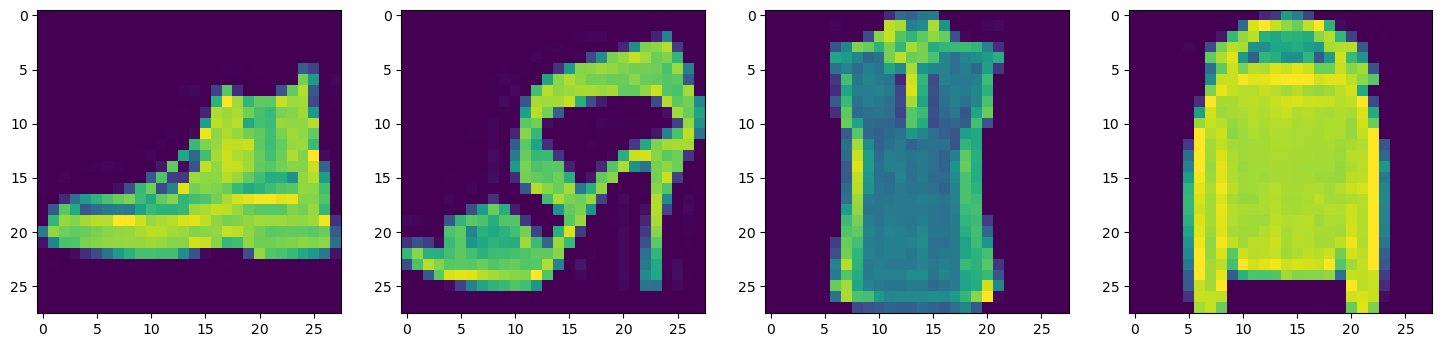

In [7]:
# Lets check some images
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

# Neural Network - 2-Layers

In [8]:
n_cols = X_train.shape[1]
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(n_cols,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_validate, y_validate),
                    callbacks=[reduce_lr])

Epoch 1/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6982 - loss: 0.9429 - val_accuracy: 0.8336 - val_loss: 0.4715 - learning_rate: 1.0000e-04
Epoch 2/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8427 - loss: 0.4500 - val_accuracy: 0.8555 - val_loss: 0.4119 - learning_rate: 1.0000e-04
Epoch 3/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8611 - loss: 0.4002 - val_accuracy: 0.8493 - val_loss: 0.4130 - learning_rate: 1.0000e-04
Epoch 4/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8678 - loss: 0.3771 - val_accuracy: 0.8679 - val_loss: 0.3703 - learning_rate: 1.0000e-04
Epoch 5/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8790 - loss: 0.3433 - val_accuracy: 0.8727 - val_loss: 0.3540 - learning_rate: 1.0000e-04
Epoch 6/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8826 - loss: 0.3288 - val_accuracy: 0.8708 - val_loss: 0.3535 - learning_rate: 1.0000e-04
Epoch 7/40
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 

In [11]:
model.save('model/model.h5')
model = keras.models.load_model('model/model.h5')

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.30843496322631836
Test accuracy: 89.74999785423279


# CNN - 1 Convolution layer

In [9]:
image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [10]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(Y_test, 10)

In [11]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

c:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
early_stopping_monitor = EarlyStopping(patience=5, monitor='val_loss', mode='min', verbose=1)

cnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │     2,769,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,772,362 (10.58 MB)

 Trainable params: 2,772,362 (10.58 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

history = cnn_model.fit(X_train, y_train,
          batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate),
          callbacks=[early_stopping_monitor, reduce_lr])
cnn_model.save('model/cnn_model_1.h5')

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.6392 - loss: 1.1138 - val_accuracy: 0.8292 - val_loss: 0.4928 - learning_rate: 1.0000e-04
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8221 - loss: 0.5090 - val_accuracy: 0.8586 - val_loss: 0.4065 - learning_rate: 1.0000e-04
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8487 - loss: 0.4379 - val_accuracy: 0.8658 - val_loss: 0.3776 - learning_rate: 1.0000e-04
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8614 - loss: 0.3942 - val_accuracy: 0.8799 - val_loss: 0.3485 - learning_rate: 1.0000e-04
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.8705 - loss: 0.3725 - val_accuracy: 0.8814 - val_loss: 0.3323 - learning_rate: 1.0000e-04
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 0.8762 - loss: 0.3487 - val_accuracy: 0.8861 - val_loss: 0.3173 - learning_rate: 1.0000e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/ste

In [16]:
cnn_model = keras.models.load_model('model/cnn_model_1.h5')
score = cnn_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.20450130105018616
Test accuracy: 93.00000071525574


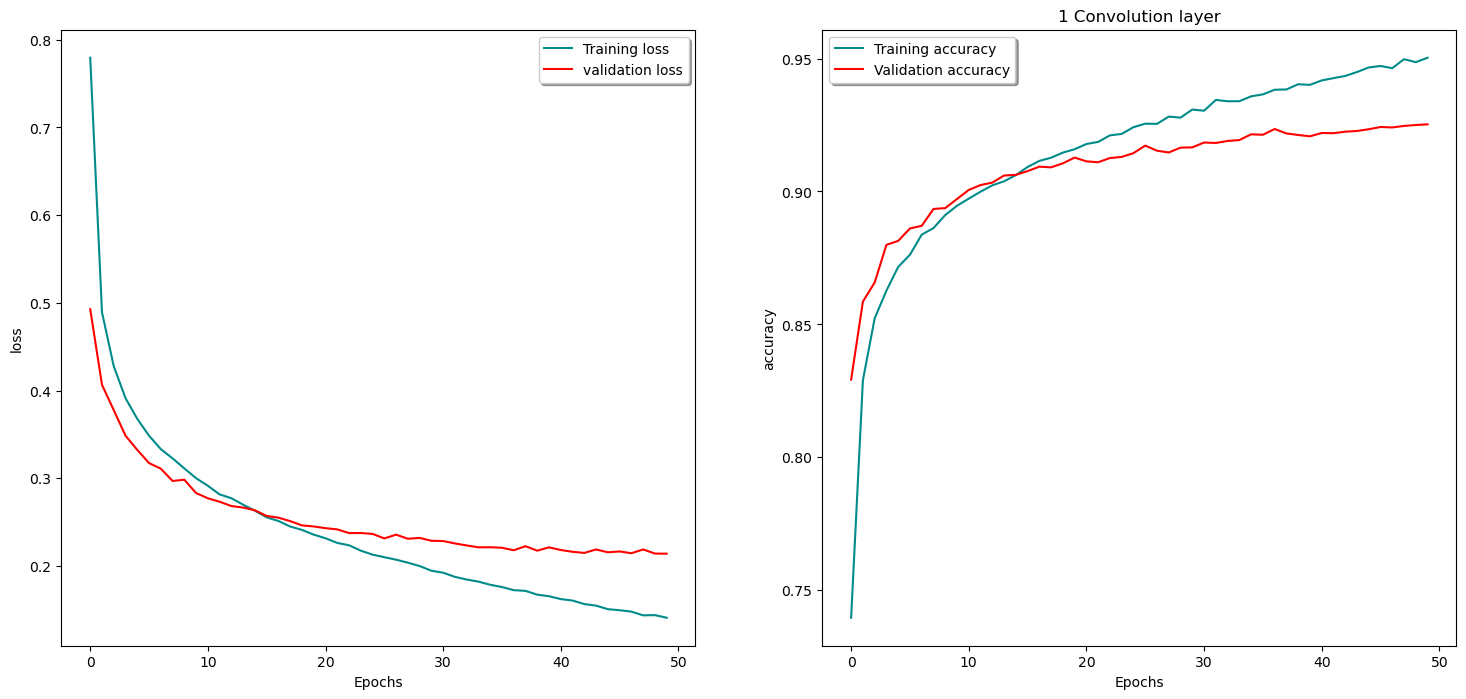

In [17]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1 Convolution layer')
plt.show()

# CNN - 2 Convolution layers

In [20]:
from keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Model

def residual_block(input_tensor, filters):
    x = Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = residual_block(x, filters=64)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

outputs = Dense(10, activation='softmax')(x)

# Create the model
cnn_model_2 = Model(inputs=inputs, outputs=outputs)

cnn_model_2.summary()
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience =10, monitor='val_loss', mode='min', verbose=1)
history_2 = cnn_model_2.fit(X_train, y_train,
          batch_size= 128,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate),
          callbacks=[early_stopping_monitor, reduce_lr])
cnn_model_2.save('model/cnn_model_2.h5')

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 26, 26,    │        640 │ input_layer_3[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 13, 13,    │          0 │ conv2d_4[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 13, 13,    │          0 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 13, 13,    │     36,928 │ dropout_6[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 13, 13,    │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 13, 13,    │          0 │ add_1[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 13, 13,    │          0 │ activation_3[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 10816)     │          0 │ dropout_7[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 256)       │  2,769,152 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 256)       │          0 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dropout_8[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 128)       │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 2,879,882 (10.99 MB)

 Trainable params: 2,878,858 (10.98 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.7283 - loss: 0.7721 - val_accuracy: 0.7793 - val_loss: 0.6293 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.8724 - loss: 0.3530 - val_accuracy: 0.8873 - val_loss: 0.2856 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.8949 - loss: 0.2914 - val_accuracy: 0.8941 - val_loss: 0.2727 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 66ms/step - accuracy: 0.9063 - loss: 0.2580 - val_accuracy: 0.8891 - val_loss: 0.2957 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9138 - loss: 0.2370 - val_accuracy: 0.9179 - val_loss: 0.2271 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9189 - loss: 0.2238 - val_accuracy: 0.9162 - val_loss: 0.2280 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.9245 - l

In [21]:
cnn_model_2 = keras.models.load_model('model/cnn_model_2.h5')
score = cnn_model_2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.1960362195968628
Test accuracy: 94.20999884605408


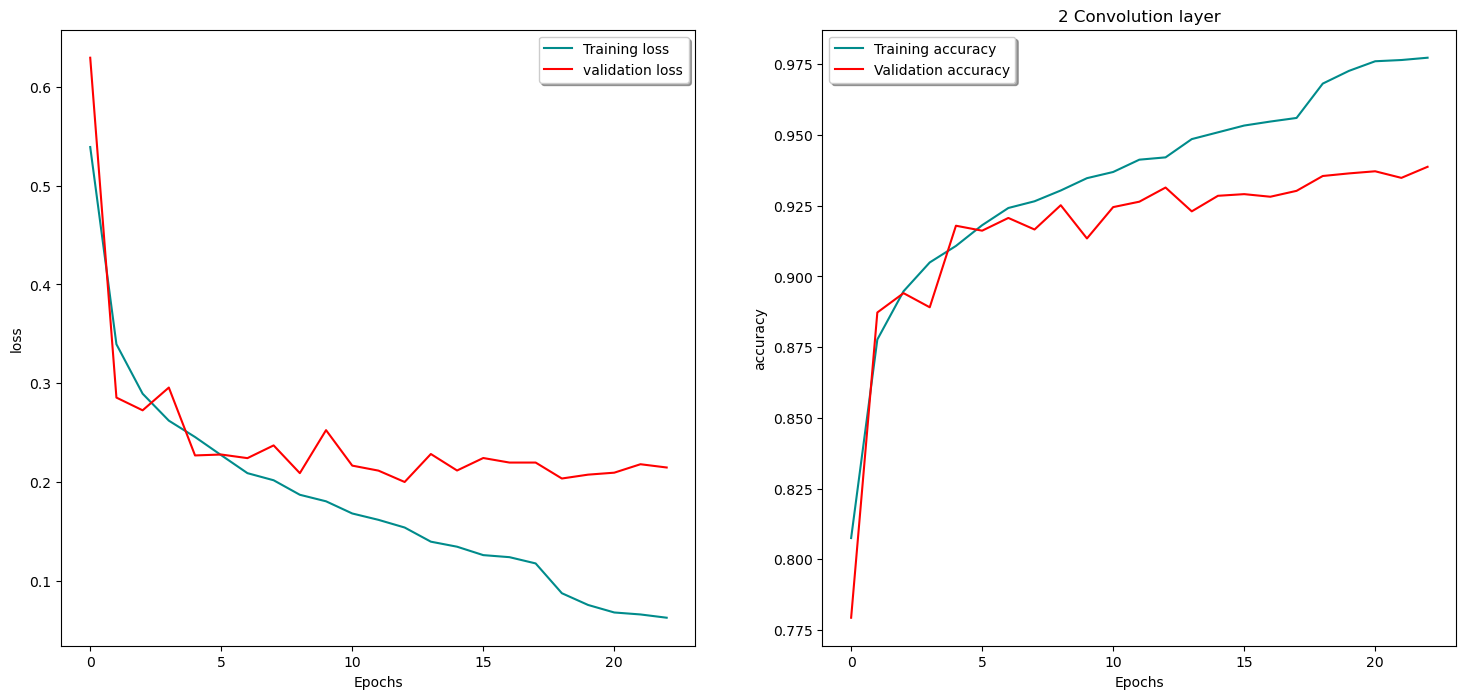

In [22]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_2.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_2.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_2.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_2.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('2 Convolution layer')
plt.show()

# CNN - 3 Convolution Layers

In [27]:
def residual_block(input_tensor, filters):
    x = Conv2D(filters, kernel_size=(3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([x, input_tensor])
    x = Activation('relu')(x)
    return x

input_shape = (28, 28, 1)
inputs = Input(shape=input_shape)

x = Conv2D(64, kernel_size=(3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = residual_block(x, filters=64)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)

outputs = Dense(10, activation='softmax')(x)

# Create the model
cnn_model_3 = Model(inputs=inputs, outputs=outputs)

cnn_model_3.summary()
cnn_model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience =10, monitor='val_loss', mode='min', verbose=1)
history_3 = cnn_model_3.fit(X_train, y_train,
          batch_size= 128,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate),
          callbacks=[early_stopping_monitor, reduce_lr])
cnn_model_3.save('model/cnn_model_3.h5')

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_19 (Conv2D)  │ (None, 26, 26,    │        640 │ input_layer_8[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 13, 13,    │          0 │ conv2d_19[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 13, 13,    │          0 │ max_pooling2d_7[… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_20 (Conv2D)  │ (None, 13, 13,    │     36,928 │ dropout_20[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_20[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_10       │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_21 (Conv2D)  │ (None, 13, 13,    │     36,928 │ activation_10[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 13, 13,    │        256 │ conv2d_21[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 13, 13,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │ dropout_20[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_11       │ (None, 13, 13,    │          0 │ add_6[0][0]       │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 13, 13,    │          0 │ activation_11[0]… │
│ (Dropout)           │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 10816)     │          0 │ dropout_21[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 256)       │  2,769,152 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 256)       │          0 │ dense_15[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dropout_22[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 128)       │     32,896 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 128)       │          0 │ dense_16[0][0]  

 Total params: 2,879,882 (10.99 MB)

 Trainable params: 2,878,858 (10.98 MB)

 Non-trainable params: 1,024 (4.00 KB)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 168ms/step - accuracy: 0.7400 - loss: 0.7551 - val_accuracy: 0.7120 - val_loss: 0.9090 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 56s 148ms/step - accuracy: 0.8787 - loss: 0.3425 - val_accuracy: 0.8922 - val_loss: 0.2945 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 59s 156ms/step - accuracy: 0.8946 - loss: 0.2940 - val_accuracy: 0.8953 - val_loss: 0.2812 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 152ms/step - accuracy: 0.9034 - loss: 0.2642 - val_accuracy: 0.9185 - val_loss: 0.2269 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 144ms/step - accuracy: 0.9150 - loss: 0.2362 - val_accuracy: 0.9237 - val_loss: 0.2169 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 61s 161ms/step - accuracy: 0.9200 - loss: 0.2220 - val_accuracy: 0.9033 - val_loss: 0.2594 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 159ms/step - accuracy: 0.9

In [28]:
cnn_model_3 = keras.models.load_model('model/cnn_model_3.h5')
score = cnn_model_3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.19370435178279877
Test accuracy: 94.2900002002716


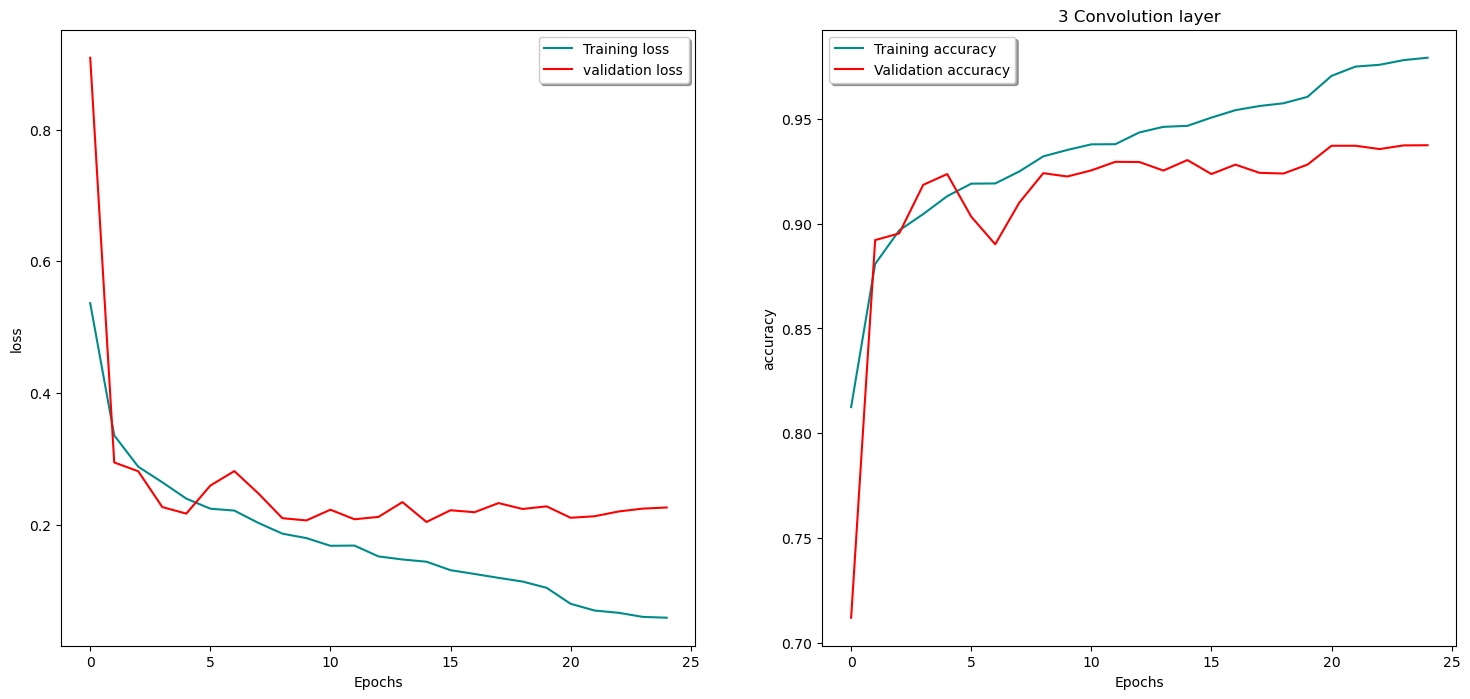

In [30]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_3.history['val_loss'], color='r', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_3.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history_3.history['val_accuracy'], color='r',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3 Convolution layer')
plt.show()

# CNN - 4 Convolution Layers with padding.

In [34]:
cnn_model_4 = Sequential()

cnn_model_4.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=input_shape))
cnn_model_4.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_4.add(MaxPooling2D(2))

cnn_model_4.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_4.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_4.add(MaxPooling2D(2, 2))
cnn_model_4.add(Dropout(0.3))

cnn_model_4.add(Flatten())
cnn_model_4.add(Dense(256, activation='relu'))
cnn_model_4.add(Dropout(0.5))
cnn_model_4.add(Dense(10, activation='softmax'))

In [35]:
cnn_model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 256)         0         
__________

In [36]:
cnn_model_4.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
history_4 = cnn_model_4.fit(X_train, y_train,
                            validation_data=(X_validate, y_validate),
                            epochs=50, 
                            batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 400us/step - loss: 0.9076 - acc: 0.6806 - val_loss: 0.5110 - val_acc: 0.8085
Epoch 2/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.5167 - acc: 0.8132 - val_loss: 0.4087 - val_acc: 0.8547
Epoch 3/50
48000/48000 [==============================] - 18s 378us/step - loss: 0.4381 - acc: 0.8446 - val_loss: 0.3744 - val_acc: 0.8642
Epoch 4/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3979 - acc: 0.8576 - val_loss: 0.3372 - val_acc: 0.8788
Epoch 5/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3660 - acc: 0.8685 - val_loss: 0.3323 - val_acc: 0.8787
Epoch 6/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3459 - acc: 0.8757 - val_loss: 0.3063 - val_acc: 0.8894
Epoch 7/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3312 - acc: 0.8817 - val_loss: 0.

In [38]:
score = cnn_model_4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.19266336570531128
Test accuracy: 93.45


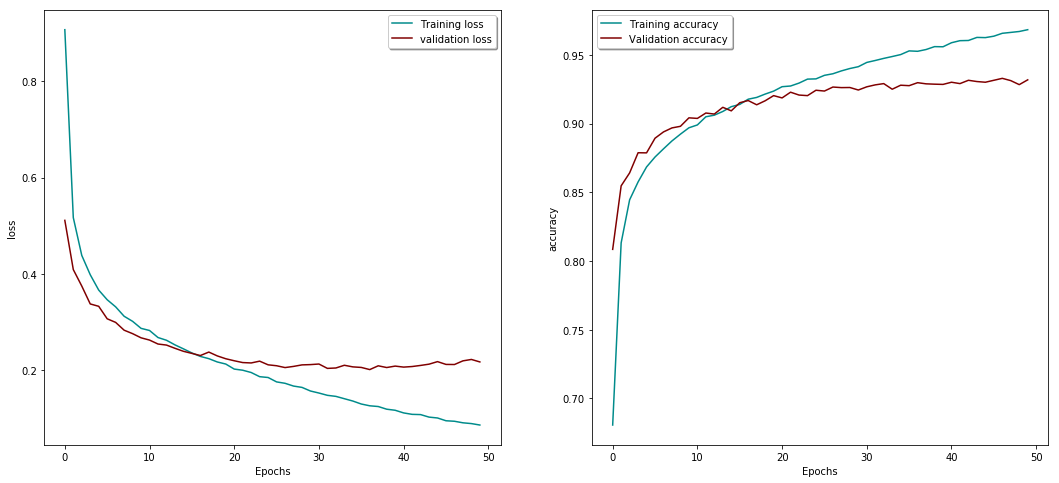

In [39]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_4.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_4.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_4.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_4.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('4 Convolution layer')
plt.show()

# CNN - 5 Convolution Layers with padding.

In [40]:
cnn_model_5 = Sequential()

cnn_model_5.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)))
cnn_model_5.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_model_5.add(MaxPooling2D(2))

cnn_model_5.add(Conv2D(128, 3, padding='same', activation ='relu'))
cnn_model_5.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_model_5.add(MaxPooling2D(2, 2))
cnn_model_5.add(Dropout(0.3))

cnn_model_5.add(Flatten())
cnn_model_5.add(Dense(256, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(512, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
cnn_model_5.add(Dense(10, activation='softmax'))

In [41]:
cnn_model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 256)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 256)         0         
__________

In [42]:
cnn_model_5.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
history_5 = cnn_model_5.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=50, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 405us/step - loss: 1.2771 - acc: 0.5096 - val_loss: 0.6087 - val_acc: 0.7689
Epoch 2/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.6574 - acc: 0.7524 - val_loss: 0.4857 - val_acc: 0.8166
Epoch 3/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.5510 - acc: 0.7966 - val_loss: 0.4394 - val_acc: 0.8382
Epoch 4/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.4884 - acc: 0.8233 - val_loss: 0.3859 - val_acc: 0.8605
Epoch 5/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.4430 - acc: 0.8421 - val_loss: 0.3540 - val_acc: 0.8691
Epoch 6/50
48000/48000 [==============================] - 19s 392us/step - loss: 0.4072 - acc: 0.8569 - val_loss: 0.3381 - val_acc: 0.8748
Epoch 7/50
48000/48000 [==============================] - 19s 391us/step - loss: 0.3831 - acc: 0.8648 - val_loss: 0.

In [44]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.20969056709222494
Test accuracy: 93.85


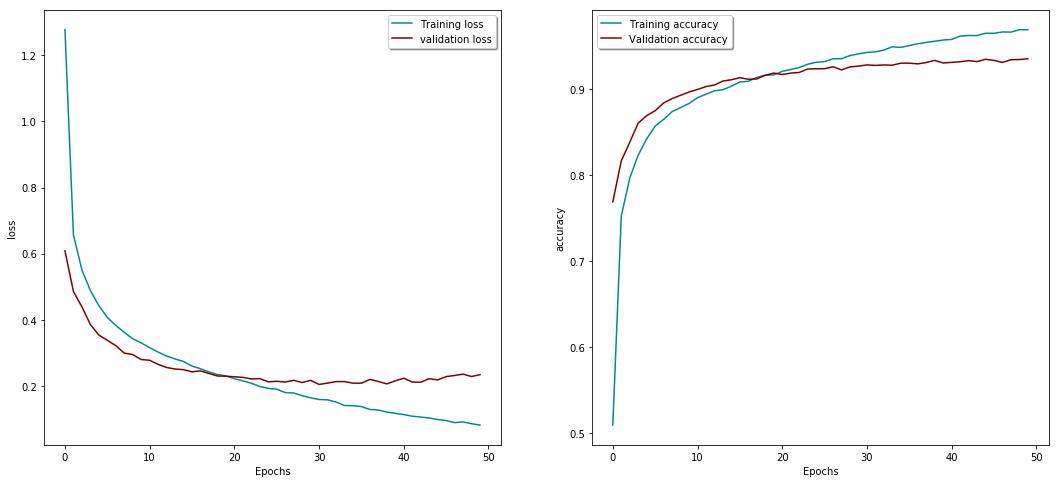

In [45]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_5.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_5.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_5.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_5.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# Image Augmentation

In [46]:
imgen = ImageDataGenerator(rotation_range=10,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.15,
                           zoom_range=0.1,
                           horizontal_flip=True,
                           vertical_flip=False)

In [47]:
history_6 = cnn_model_5.fit_generator(imgen.flow(X_train, y_train, batch_size = 300),
                                        steps_per_epoch = 48000//150,
                                        epochs=70,
                                        validation_data = imgen.flow(X_validate, y_validate,
                                                                    batch_size = 300),
                                        validation_steps=12000//150,
                                        use_multiprocessing = True)

Epoch 1/70
320/320 [==============================] - 40s 124ms/step - loss: 0.5141 - acc: 0.8217 - val_loss: 0.3633 - val_acc: 0.8638
Epoch 2/70
320/320 [==============================] - 40s 123ms/step - loss: 0.3873 - acc: 0.8616 - val_loss: 0.3226 - val_acc: 0.8815
Epoch 3/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3579 - acc: 0.8718 - val_loss: 0.3063 - val_acc: 0.8880
Epoch 4/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3378 - acc: 0.8791 - val_loss: 0.2914 - val_acc: 0.8950
Epoch 5/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3240 - acc: 0.8849 - val_loss: 0.2862 - val_acc: 0.8955
Epoch 6/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3148 - acc: 0.8870 - val_loss: 0.2784 - val_acc: 0.8990
Epoch 7/70
320/320 [==============================] - 40s 124ms/step - loss: 0.3031 - acc: 0.8911 - val_loss: 0.2704 - val_acc: 0.9007
Epoch 8/70
320/320 [==============================] - 4

In [48]:
score = cnn_model_5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1] * 100)

Test loss: 0.17151972761452197
Test accuracy: 94.14


# Batch Normalization

In [49]:
cnn_all = Sequential()

cnn_all.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(28,28,1)))
BatchNormalization()

cnn_all.add(Conv2D(64, 3, padding='same', activation='relu'))
cnn_all.add(MaxPooling2D(2))
BatchNormalization()


cnn_all.add(Conv2D(128, 3, padding='same', activation ='relu'))
BatchNormalization()

cnn_all.add(Conv2D(256, 3, padding='same', activation ='relu'))
cnn_all.add(MaxPooling2D(2, 2))
cnn_all.add(Dropout(0.3))
BatchNormalization()

cnn_all.add(Flatten())

cnn_all.add(Dense(256, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Dense(512, activation='relu'))
cnn_all.add(Dropout(0.5))
BatchNormalization()

cnn_model_5.add(Dense(1024, activation='relu'))
cnn_model_5.add(Dropout(0.5))
BatchNormalization()

cnn_all.add(Dense(10, activation='softmax'))

In [50]:
cnn_all.compile(optimizer=Adam(lr = 0.0001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
history_all = cnn_all.fit(X_train, y_train,
                    validation_data=(X_validate, y_validate),
                    epochs=50, 
                    batch_size=300)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 19s 393us/step - loss: 1.1438 - acc: 0.5806 - val_loss: 0.5596 - val_acc: 0.7858
Epoch 2/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.6169 - acc: 0.7731 - val_loss: 0.4658 - val_acc: 0.8324
Epoch 3/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.5269 - acc: 0.8097 - val_loss: 0.4102 - val_acc: 0.8533
Epoch 4/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.4703 - acc: 0.8310 - val_loss: 0.3782 - val_acc: 0.8623
Epoch 5/50
48000/48000 [==============================] - 18s 382us/step - loss: 0.4285 - acc: 0.8460 - val_loss: 0.3551 - val_acc: 0.8696
Epoch 6/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.3981 - acc: 0.8586 - val_loss: 0.3364 - val_acc: 0.8787
Epoch 7/50
48000/48000 [==============================] - 18s 381us/step - loss: 0.3742 - acc: 0.8662 - val_loss: 0.

In [52]:
y_pred = cnn_all.predict_classes(X_test, verbose=0)
score = cnn_all.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.204320695027709
Test accuracy: 93.37


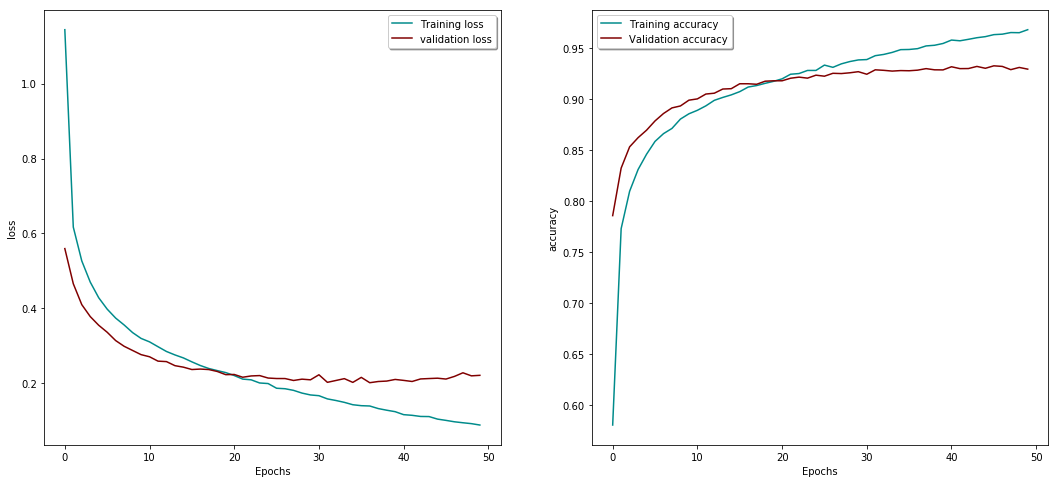

In [53]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history_all.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history_all.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.subplot(122)
plt.plot(history_all.history['acc'], color='darkcyan', label="Training accuracy")
plt.plot(history_all.history['val_acc'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.show()

# Confusion Matrix.

In [54]:
classes = {0: 'T-shirt/top', 
           1: 'Trouser', 
           2: 'Pullover', 
           3: 'Dress', 
           4: 'Coat',
           5: 'Sandal', 
           6: 'Shirt', 
           7: 'Sneaker', 
           8: 'Bag', 
           9: 'Ankle boot'}

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                       'Sandal','Shirt','Sneaker','Bag','Ankle boot']

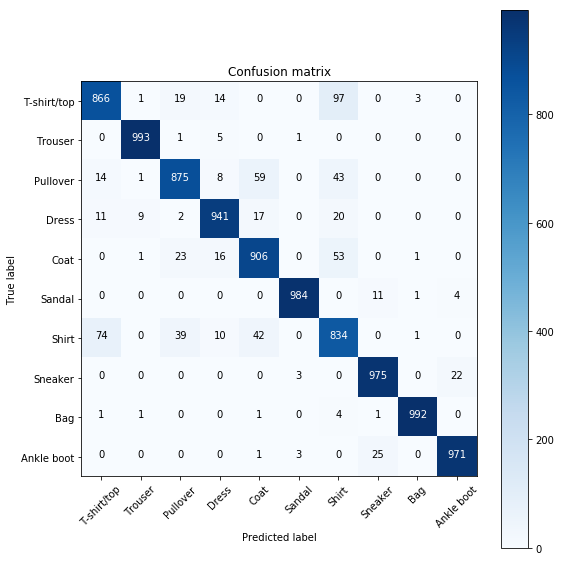

In [55]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [56]:
print(classification_report(Y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.90      0.87      0.88      1000
        1.0       0.99      0.99      0.99      1000
        2.0       0.91      0.88      0.89      1000
        3.0       0.95      0.94      0.94      1000
        4.0       0.88      0.91      0.89      1000
        5.0       0.99      0.98      0.99      1000
        6.0       0.79      0.83      0.81      1000
        7.0       0.96      0.97      0.97      1000
        8.0       0.99      0.99      0.99      1000
        9.0       0.97      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000

